## Project Statement:
The aim is to estimate the relative CPU performance of a computer hardware dataset. 

## Data Set Information:

The estimated relative performance values were estimated by the authors using a linear regression method. See their article (pp 308-313) for more details on how the relative performance values were set.


**Attribute Information:**

1. vendor name: 30
(adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec,
dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson,
microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry,
sratus, wang)
2. Model Name: many unique symbols
3. MYCT: machine cycle time in nanoseconds (integer)
4. MMIN: minimum main memory in kilobytes (integer)
5. MMAX: maximum main memory in kilobytes (integer)
6. CACH: cache memory in kilobytes (integer)
7. CHMIN: minimum channels in units (integer)
8. CHMAX: maximum channels in units (integer)
9. PRP: published relative performance (integer)
10. ERP: estimated relative performance from the original article (integer)

In [1]:
# importing python libraries

import numpy as np # for mathematical operations
import pandas as pd # to manage the dataset

# for visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the dataset

input_file = "machine.data.csv"

df = pd.read_csv(input_file, header = None)

## Exploratory Data Analysis

In [3]:
#printing first 5 rows of dataset

print(df.head(5))

# printing shape of the dataset

print(df.shape)

         0        1    2     3      4    5   6    7    8    9
0  adviser    32/60  125   256   6000  256  16  128  198  199
1   amdahl   470v/7   29  8000  32000   32   8   32  269  253
2   amdahl  470v/7a   29  8000  32000   32   8   32  220  253
3   amdahl  470v/7b   29  8000  32000   32   8   32  172  253
4   amdahl  470v/7c   29  8000  16000   32   8   16  132  132
(209, 10)


In [4]:
# renaming columns of dataframe df

col_names = ['Vendor Name','Model Name', 'Machine Cycle Time', 'Min Memory', 'MAX Memory', 'Cache memory'
             ,'MIN Channel', 'MAX Channel', 'Published RP', 'Estimated RP' ]

df.columns = col_names

In [5]:
df.head()

,Vendor Name,Model Name,Machine Cycle Time,Min Memory,MAX Memory,Cache memory,MIN Channel,MAX Channel,Published RP,Estimated RP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [6]:
# to get the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Vendor Name         209 non-null    object
 1   Model Name          209 non-null    object
 2   Machine Cycle Time  209 non-null    int64 
 3   Min Memory          209 non-null    int64 
 4   MAX Memory          209 non-null    int64 
 5   Cache memory        209 non-null    int64 
 6   MIN Channel         209 non-null    int64 
 7   MAX Channel         209 non-null    int64 
 8   Published RP        209 non-null    int64 
 9   Estimated RP        209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [7]:
# seperating the categorical columns from the dataframe

df_cat = [column for column in df.columns if df[column].dtype=='O']
df_cat

['Vendor Name', 'Model Name']

In [8]:
# As from the dataset introduction we got to know there are 30 vendors,
# checking the count of each vendor in the dataframe

df['Vendor Name'].value_counts()

ibm             32
nas             19
sperry          13
honeywell       13
ncr             13
siemens         12
cdc              9
amdahl           9
burroughs        8
hp               7
dg               7
harris           7
c.r.d            6
ipl              6
magnuson         6
dec              6
cambex           5
prime            5
formation        5
perkin-elmer     3
gould            3
nixdorf          3
basf             2
bti              2
apollo           2
wang             2
microdata        1
adviser          1
sratus           1
four-phase       1
Name: Vendor Name, dtype: int64

In [9]:
# finding out if there are any duplicate model names 

df['Model Name'].duplicated().any()

False

In [10]:
#Seperating numerical columns from the dataframe

df_num = [column for column in df.columns if df[column].dtype!='O']
df_num

['Machine Cycle Time',
 'Min Memory',
 'MAX Memory',
 'Cache memory',
 'MIN Channel',
 'MAX Channel',
 'Published RP',
 'Estimated RP']

In [12]:
# printing top 5 rows of numerical variables
df[df_num]

,Machine Cycle Time,Min Memory,MAX Memory,Cache memory,MIN Channel,MAX Channel,Published RP,Estimated RP
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...
204,124,1000,8000,0,1,8,42,37
205,98,1000,8000,32,2,8,46,50
206,125,2000,8000,0,2,14,52,41
207,480,512,8000,32,0,0,67,47


In [13]:
# As we see in the dataframe we have Published RP and  Estimated RP,
# our aim is to predict the Estimated RP, hence it is the target variable.
# Published RP is a redundant column and can ignored.

In [14]:
# computing standard correlation coefficients (Pearson's r) for each pair of attributes

corr_matrix = df.corr()
corr_matrix

,Machine Cycle Time,Min Memory,MAX Memory,Cache memory,MIN Channel,MAX Channel,Published RP,Estimated RP
Machine Cycle Time,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
Min Memory,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
MAX Memory,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
Cache memory,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
MIN Channel,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
MAX Channel,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
Published RP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
Estimated RP,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


In [15]:
# checking the correlation coefficients for the target variable 

corr_matrix['Estimated RP'].sort_values(ascending=False)

Estimated RP          1.000000
Published RP          0.966472
MAX Memory            0.901202
Min Memory            0.819292
Cache memory          0.648620
MIN Channel           0.610580
MAX Channel           0.592156
Machine Cycle Time   -0.288396
Name: Estimated RP, dtype: float64

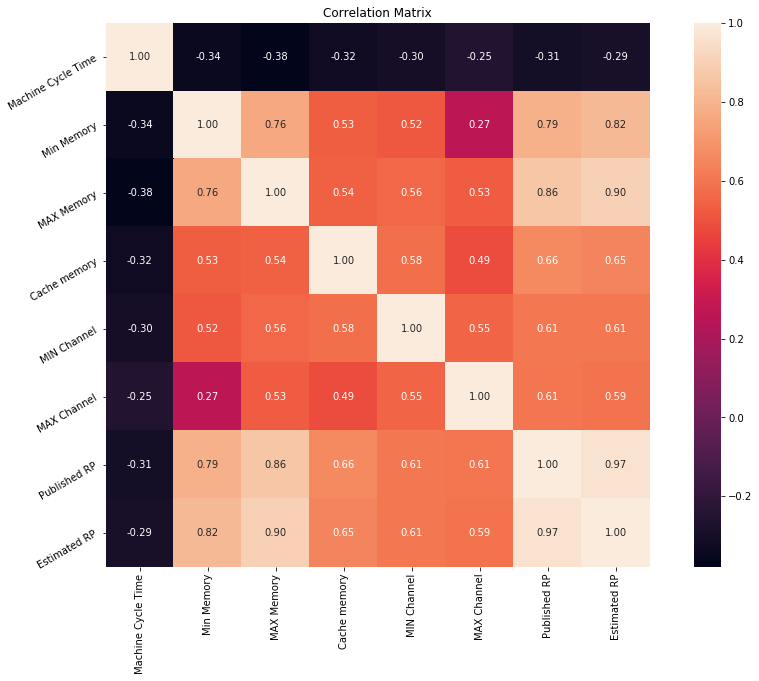

In [16]:
# From the correlation matrix, we found that Estimated RP is positively correlated with 
# Min Memory, MAX Memory, Cache Memory , MIN Channel and MAX Channel.

# plotting correlation heat map

plt.figure(figsize=(16,10))
plt.title('Correlation Matrix')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [17]:
# To check outliers in discrete variables

df.describe()

,Machine Cycle Time,Min Memory,MAX Memory,Cache memory,MIN Channel,MAX Channel,Published RP,Estimated RP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [18]:
# checking for null values

df.isnull().sum()

Vendor Name           0
Model Name            0
Machine Cycle Time    0
Min Memory            0
MAX Memory            0
Cache memory          0
MIN Channel           0
MAX Channel           0
Published RP          0
Estimated RP          0
dtype: int64

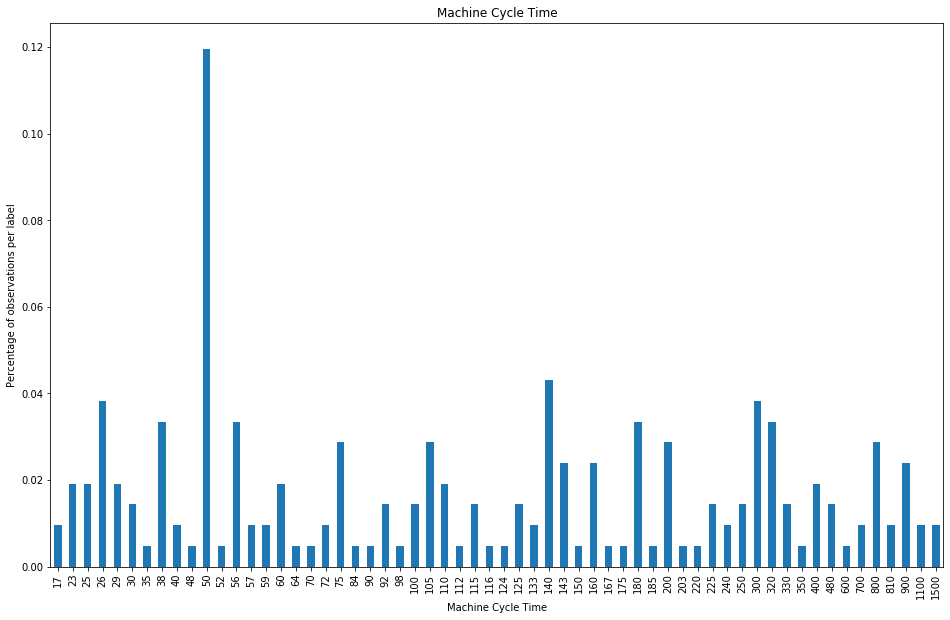

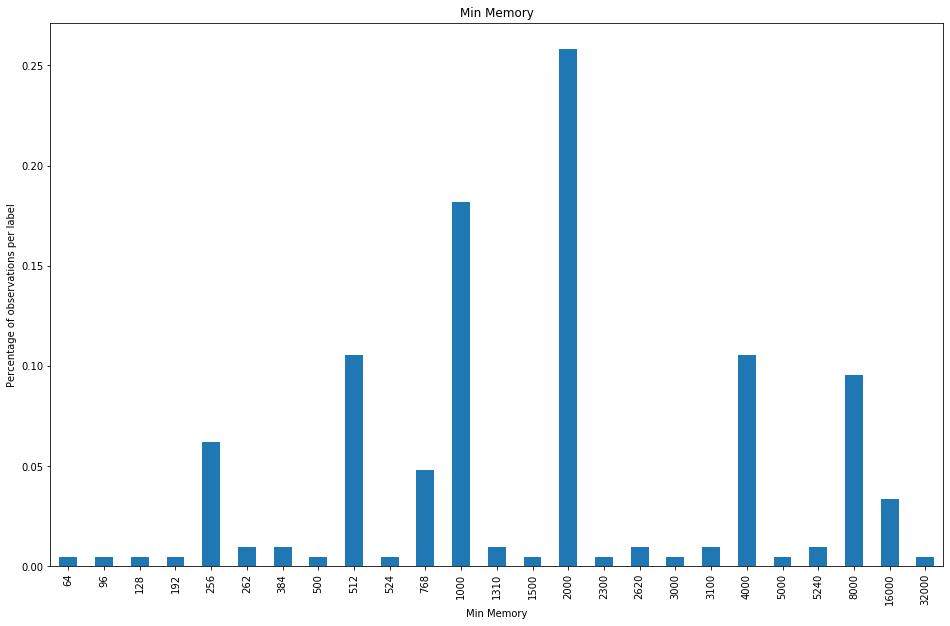

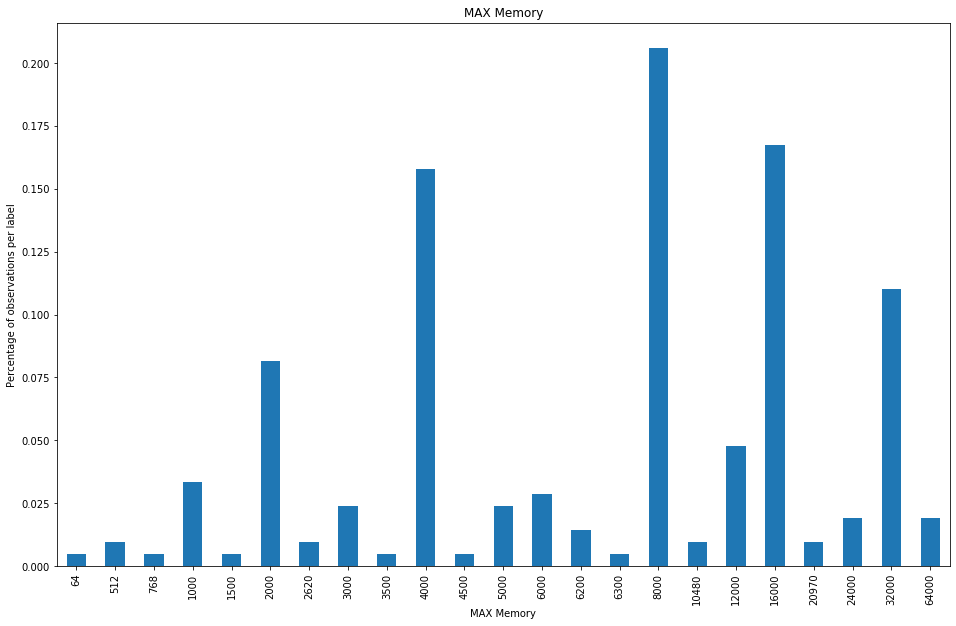

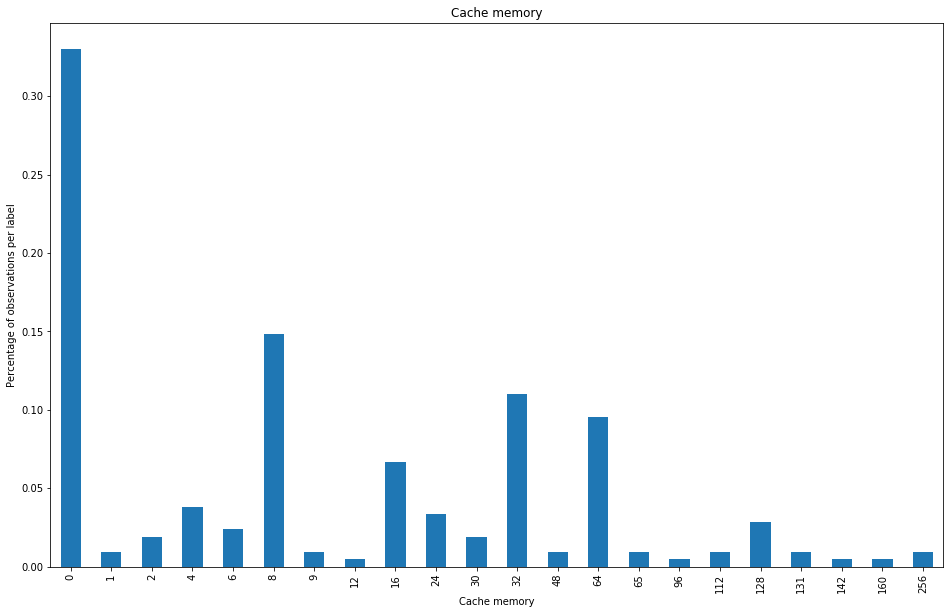

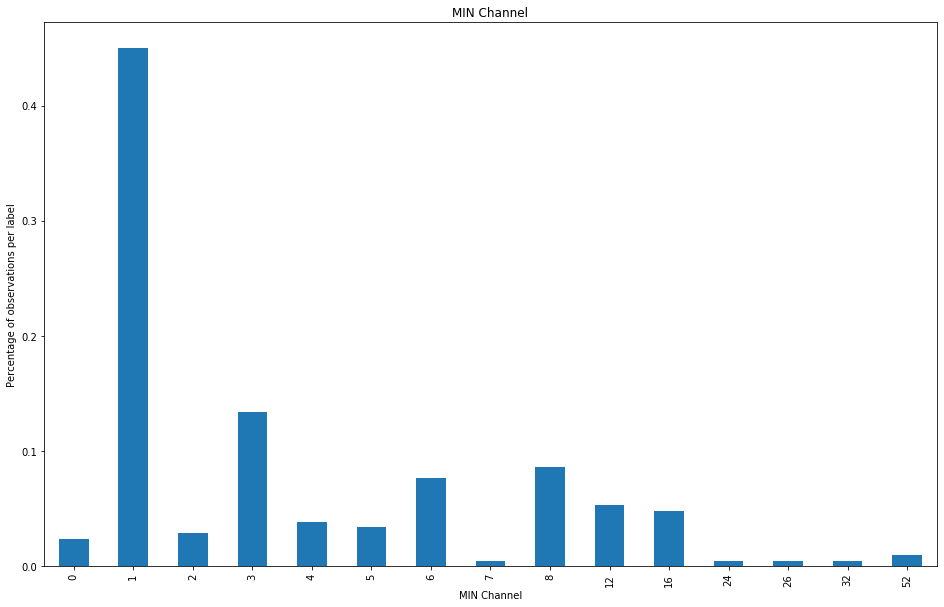

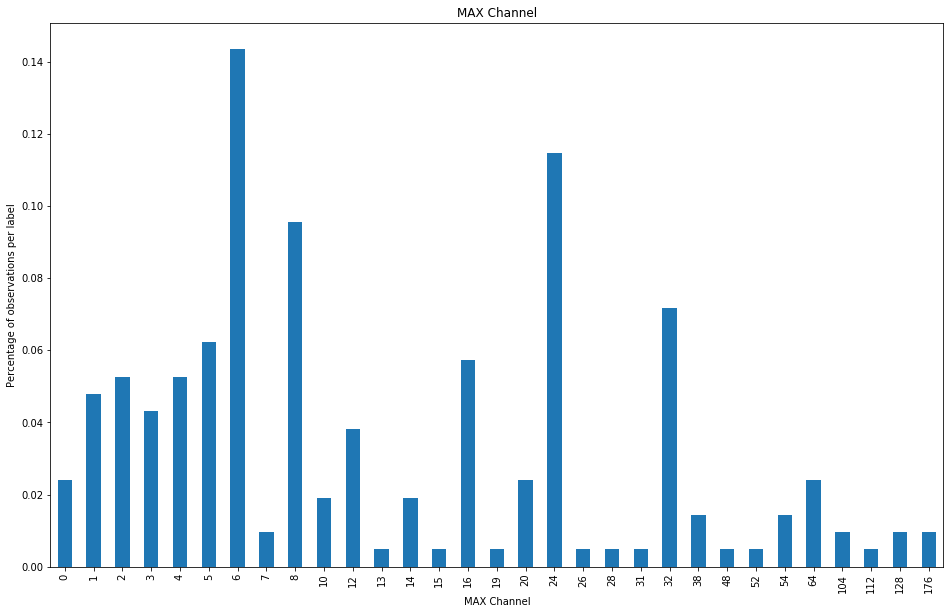

In [19]:
# detect outliers in discrete variables

for var in ['Machine Cycle Time', 'Min Memory', 'MAX Memory', 'Cache memory', 'MIN Channel', 'MAX Channel']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

In [20]:
#From the above plot, we can see that the discrete variables show values that are shared by a tiny proportion of variable values in the dataset. For linear regression modeling, this does not cause any problem.

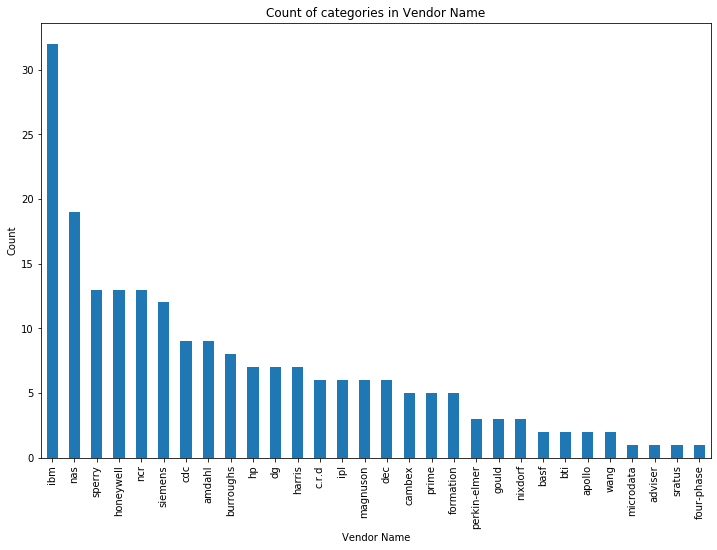

In [21]:
# plot the categorical variable "Vendor Name"

plt.figure(figsize=(12,8))
(df['Vendor Name'].value_counts()).plot.bar()
plt.title('Count of categories in Vendor Name')
plt.xlabel('Vendor Name')
plt.ylabel('Count')
plt.show()

In [22]:
# Splitting the dataset into numerical and categorical dataset

df_categorical = df.iloc[:,:2]

df_categorical.head()

,Vendor Name,Model Name
0,adviser,32/60
1,amdahl,470v/7
2,amdahl,470v/7a
3,amdahl,470v/7b
4,amdahl,470v/7c


In [23]:
df_numerical = df.iloc[:, 2:]

df_numerical.head()

,Machine Cycle Time,Min Memory,MAX Memory,Cache memory,MIN Channel,MAX Channel,Published RP,Estimated RP
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132


## Linear Regression Modelling

In [24]:
# Selecting the predictor and target variables from df_numerical
# We will ignore Published RP as it is a redundant column

X = df_numerical.iloc[:,0:6]

Y = df_numerical.iloc[:,-1]

In [25]:
# Splitting data into test and train

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0)

In [26]:
# checking shape of test and training data

X_train.shape, Y_train.shape

((146, 6), (146,))

In [27]:
X_test.shape, Y_test.shape

((63, 6), (63,))

In [28]:
#  We will using Feature Scaling method to standardize the data 
# I am using StandardScaler from sklearn for feature

# importing the StandardScaler class from preprocessing library
from sklearn.preprocessing import StandardScaler

# instantiate an object scaler
scaler = StandardScaler()

# fit the scaler to the training set and then transform it
X_train = scaler.fit_transform(X_train)

# transform the test set
X_test = scaler.transform(X_test)

In [29]:
# Build and fit the linear regression model

# importing the LinearRegression class from linear_model library
from sklearn.linear_model import LinearRegression

# instantiate an object lr
lr = LinearRegression()


# Train the model using the training sets
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# Predicting on the test data set
y_pred = lr.predict(X_test)
y_pred

array([ 53.25899879,  -7.30914167,  85.61134478, 333.46353054,
        88.17105392, -16.58129332,  92.52796135,  53.8453543 ,
       266.93488421, 197.13339895,  26.12367068, 521.67728638,
        70.27440089, 218.8743902 , 445.39038784,   6.44136356,
        27.42701247, -16.02341777, -40.97025653, -11.14771009,
       -25.83227337,  99.791943  , 455.57718867,  40.31328116,
        26.03695563,  95.11716367,  -2.61725869,  10.65043882,
       -28.67074614,  34.28080493,  75.81219309,  34.33609154,
        30.89585298, 101.03428352, 128.44097378, 105.58922964,
       -18.07256295,  49.13283719, -14.85928465,  99.73223861,
       246.11502923, 101.53746022,  -2.28180257,  39.6908657 ,
       193.38408096,  16.24970661,  99.73223861,  52.59588689,
        94.55018262,   9.87432157,   3.17893711,  -1.11130888,
       100.93320523, 388.01564587, 667.35491836,  10.34074574,
        38.80918893,  27.03972685,  86.46175062,  40.40157359,
       311.58243355,  17.36264211,  24.05834246])

In [31]:
# coefficeints of the trained model
coeff = lr.coef_
coeff

array([17.70202595, 59.11241774, 78.35042681, 16.53981449, -0.35410978,
       38.97256261])

In [32]:
# intercept of the model
intercept = lr.intercept_
intercept

100.0

In [33]:
# Building dataframe that contains features and estimated coefficients.

dataset = list(zip(pd.DataFrame(X_train).columns, lr.coef_))

pd.DataFrame(data = dataset, columns = ['Features', 'Estimated Coefficients']).set_index('Features')

,Estimated Coefficients
Features,
0,17.702026
1,59.112418
2,78.350427
3,16.539814
4,-0.354110
5,38.972563


## Evaluating Model Performance

In [34]:
# RMSE(Root Mean Square Error)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
rmse

37.98514804528243

In [35]:
# R2 Score

from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred)
r2

0.92076066251637

In business decisions, the benchmark for the R2 score value is 0.7. It means if R2 score value >= 0.7, then the model is good enough to deploy on unseen data whereas if R2 score value < 0.7, then the model is not good enough to deploy.

Our R2 score value has been found to be 0.92. It means that this model explains 92% of the variance in our dependent variable. So, the R2 score value confirms that the model is good enough to deploy because it provides good fit to the data.

In [36]:
# Evaluating training set performance

score_training = lr.score(X_train, Y_train)
score_training.round(2)

0.91

In [37]:
# Evaluating test set performance

score_test = lr.score(X_test, Y_test)
score_test.round(2)

0.92

Training set and test set performances are comparable. An R Square value of 0.92 is very good.

In [38]:
# import the library
from sklearn.model_selection import cross_val_score

# Compute 5-fold cross-validation scores: cv_scores
cross_val_scores = cross_val_score(lr, X, Y, cv=5)

In [39]:
cross_val_scores.round(2)

array([ 0.85, -0.86,  0.71,  0.88,  0.77])

In [40]:
avg_score = np.mean(cross_val_scores).round(2)
avg_score

0.47

## Conclusion:
The r-squared or the coefficient of determination is 0.4691 on an average for 5-fold cross validation. It means that the predictor is only able to explain 46.91% of the variance in the target variable. This indicates that the model is not a good fit to the data.

So, we can conclude that the linear regression model is unable to model the data to generate decent results. It should be noted that the model is performing equally on both training and testing datasets. It seems like a case where we would need to model this data using methods that can model non-linear relationships. Also variables need to be transformed to satisfy the normality assumption.